# Hypothesis Testing

## One sample t-test

We have 100 patients. We want to check their level of glycose in blood. Ideally, it should be 5.7 (normal level). With significance level of 5% test the hypothesis that the average glycose level is normal.

$ H_0: \mu = 5.7$

$ H_1: \mu \neq 5.7$



In [1]:
import numpy as np

patients=np.random.normal(6, 1.7, 100)

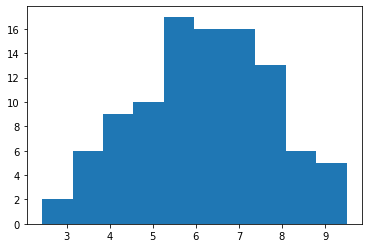

In [2]:
import matplotlib.pyplot as plt
plt.hist(patients);

In [3]:
np.mean(patients)

6.165451166492606

In [4]:
np.std(patients)

1.5506387676289042

In [5]:
from scipy.stats import ttest_1samp

In [16]:
ttest_1samp(patients, 6.05)

Ttest_1sampResult(statistic=0.7408073540886688, pvalue=0.4605637393471783)

Since pvalue is 0.0035, which is below significance level, the probability of being wrong by rejecting the Null Hypothesis is 0.35%, so I can reject it. 

Since statistics is above the critical value (1.96), we reject the Null Hypothesis.

In [8]:

patients2=np.random.normal(5.7, 1.7, 100)# sample of 100 datapoints with mean=5.7 and std=1.7
ttest_1samp(patients2, 5.7)

Ttest_1sampResult(statistic=-0.614417106493681, pvalue=0.5403492258932937)

In [9]:
patients2.mean()

5.585407627216098

Given the sample, constant we are comparing to and significance level:
1. import ttest
2. run ttest
3. read the outcome of ttest

## Two sample tests

In [17]:
import pandas as pd
df=pd.read_csv('https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/data/module-2/blood_pressure.csv')

In [19]:
df.head()

,before,after
0,136.713072,92.432965
1,134.735618,105.022643
2,127.529115,82.242766
3,144.527126,93.607172
4,124.214720,103.212223


In [20]:
from scipy.stats import ttest_rel

In [21]:
ttest_rel(df.before, df.after)

Ttest_relResult(statistic=27.291841767560236, pvalue=7.303035069608042e-48)

According to the results of related t-test we can see the following:
1. pvalue is 0. Hence it is below significance level => reject $H_0$
2. t statistics is outside of critical region (27 is outside of any region). Hence, we reject the Null Hypothesis. 
3. For the 2sided test it is enough. While for 1 sided test since we have positive value of statistics, we conclude that the value before is higher than the value after.

In [22]:
df.mean()


before    136.536953
after      99.236700
dtype: float64

In [23]:
#second approach
df['diff']=df.eval('before-after')

In [24]:
df.head()

,before,after,diff
0,136.713072,92.432965,44.280107
1,134.735618,105.022643,29.712975
2,127.529115,82.242766,45.286349
3,144.527126,93.607172,50.919953
4,124.214720,103.212223,21.002497


In [27]:
ttest_1samp(df['diff'],0)

Ttest_1sampResult(statistic=27.291841767560236, pvalue=7.303035069608042e-48)

### 2 sample Independent t-test

In [28]:
df2=pd.read_csv('https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/data/module-2/ab_test.csv')

In [29]:
df2

,a,b
0,0.27,13.61
1,6.08,21.53
2,13.74,9.23
3,9.70,5.36
4,7.00,12.90
5,4.77,10.83
6,2.56,10.70
7,7.24,15.57
8,7.30,10.42
9,0.86,18.90


In [30]:
from scipy.stats import ttest_ind

In [31]:
ttest_ind(df2.a, df2.b)

Ttest_indResult(statistic=-2.637533181209767, pvalue=0.009713140852447347)

Given the pvalue I reject the Null Hypothesis. The difference between 2 options is statistically significant. And given the sign of the statistics value I conclude that version b has higher mean than version a. 

#### The case of different variances

In [32]:
ttest_ind(df2.a, df2.b, equal_var=False)

Ttest_indResult(statistic=-2.637533181209767, pvalue=0.009776243024828825)

In [33]:
df2.mean()

a     9.3554
b    12.4660
dtype: float64

In [34]:
from statsmodels.api import stats

In [41]:
stats.ttest_ind(df2.a, df2.b, alternative='two-sided')

(-2.637533181209764, 0.009713140852447424, 98.0)